# Homework 2

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


# 1. Fridge Light Failure

Imagine that you work for a company that sells fridges, with a lifetime warranty for the fridge lights. Your boss is interested in understanding the distribution of the number of lights that will fail in a given month, based on data collected over the last several years. The data were collected by hand and manually entered, so data entry errors are possible. There are also some months with missing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import zscore
from scipy.special import factorial
import scipy.optimize as so

In [2]:
# Uncomment the line below if you are using Google colab
# !gdown https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF

1. Read the CSV file using Pandas and store it. All you've been given are a meaningless ID and the counts of the number of fridge lights that failed in each month.

In [3]:
fridgedata = pd.read_csv("Fridge Light Data.csv")
fridgedata.head()

,ID,x
0,1,24.0
1,2,33.0
2,3,31.0
3,4,NaN
4,5,31.0


2. Count the number of null values in the dataset, then remove them.

In [ ]:
fridgedata.isnull().sum() # 4 initial null values
fridgedata.dropna(inplace=True)

Number of null values: 4

3. Plot the distribution of the data. Add a title and axes labels to your plot.

Text(0.5, 1.0, 'Distribution of fridge light failures in each month')

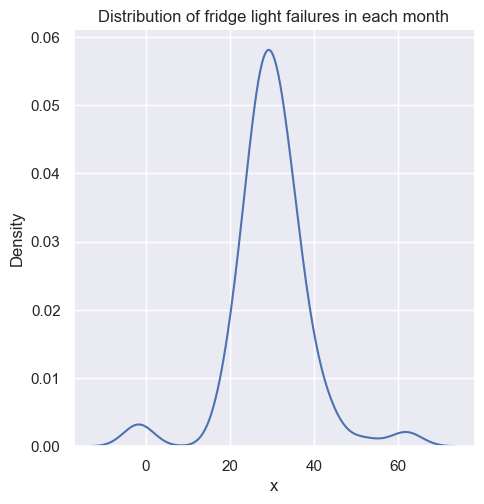

In [5]:
sns.set_theme(color_codes=True)
sns.displot(data=fridgedata, x = fridgedata["x"], kind = 'kde')
plt.title("Distribution of fridge light failures in each month")

4. Count the number of observations that you know with **certainty** are data entry errors, then remove them. Explain why you know they are errors.

In [6]:
(fridgedata["x"] < 0).sum() # 3 entries that are negative
fridgedata.drop(fridgedata[fridgedata.x < 0].index, inplace=True)

Number of certain data entry errors: 3 negative counts. I know they are errors because it is impossible to count negative numbers of a fridge light not working.

5. Compute the negative log-likelihood based on the assumption that the data comes from a Poisson($\lambda$) distribution. The negative log-likelihood for a Poisson($\lambda$) distribution is as follows:

$$
nll(\lambda) = n \lambda - \left(\sum_{i=1}^{n}x_i\right) log(\lambda) + \sum_{i=1}^{n}log(x_i!)
$$

In [7]:
def poissonNegLogLikelihood(lamb, data):
    negloglike = len(data)*lamb - (np.sum(data))*(np.log(lamb)) + np.sum(np.log(factorial(data)))
    return negloglike


#test your function on a dummy dataset with lambda = 25
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
poissonNegLogLikelihood(25, dummy_data.x)


np.float64(31.189286095130285)

6. Consider integer values of $\lambda$ ranging from 10 to 50. Compute the negative log-likelihood for each of these values and plot it. Include a title and axes labels on your plot. Based on the plot, what value of $\lambda$ is most likely to have generated the data? You may give a small range.

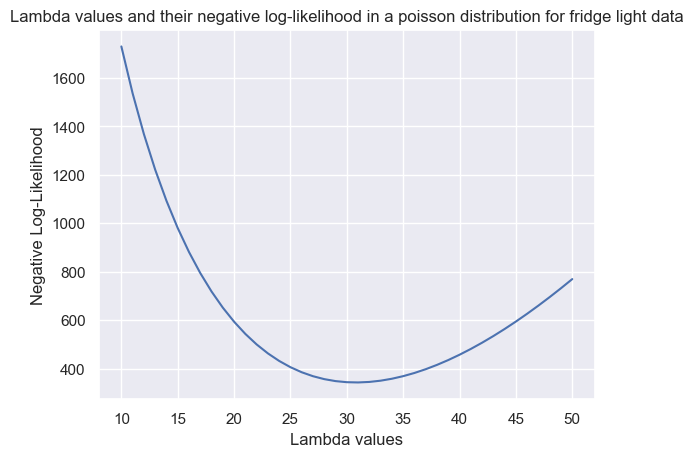

In [8]:
listofNegLL = []
for i in range(10, 51):
    NegLL = poissonNegLogLikelihood(i, fridgedata.x)
    listofNegLL.append(NegLL)
    
plt.plot(range(10,51), listofNegLL)
plt.xlabel("Lambda values")
plt.ylabel("Negative Log-Likelihood")
plt.title("Lambda values and their negative log-likelihood in a poisson distribution for fridge light data")
plt.show()
    


Value of $\lambda$ most likely to have generated the data: between 25 and 35, centered at approximately 30

7. Compute the negative log-likelihood based on the assumption that the data comes from a Normal($\mu$, $\sigma$) distribution. The negative log-likelihood for a Normal($\mu$, $\sigma$) distribution is as follows:

$$
nll(\mu, \sigma) = \frac{n}{2}log(2π) + \frac{n}{2}log(\sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

In [9]:

def normalNegLogLikelihood(param, data):
    normloglike = (len(data)/2) * (np.log(2*np.pi) + np.log((param[1])**2)) + (np.sum((data - param[0])**2))/(2*(param[1])**2)
    return normloglike



#test your function on a dummy dataset with mu = 25, sigma = 3
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
normalNegLogLikelihood([25, 3], dummy_data.x)

np.float64(50.80997633158613)

8. Determine the exact value of $\lambda$ that minimizes the negative log-likelihood for the Poisson distribution. Use so.minimize with method="Powell" and without a Jacobian.

In [10]:
def poissonnLL(lamb):
    pnegll = poissonNegLogLikelihood(lamb[0], fridgedata.x)
    return pnegll

resultp = so.minimize(poissonnLL, x0=[30], method="Powell")
resultp.x

array([30.82000019])

Value of $\lambda$ that minimizes the negative log-likelihood: 30.82000019

9. Determine the set of values of $\mu$ and $\sigma$ that minimizes the negative log-likelihood for the Normal distribution.

In [11]:
def normalnLL(param):
    normnegll = normalNegLogLikelihood(param, fridgedata.x)
    return normnegll

resultn = so.minimize(normalnLL, x0 = [1,1], method="Powell")
resultn.x

array([30.8205512 ,  7.34768916])

Values for $\mu$ and $\sigma$ that minimize the negative log-likelihood: 30.8205512, 7.34768916


10. There are three data entry errors that could potentially be valid entries. Which three are most likely to be data entry errors? Identify them by their value (i.e., not their index in the data).

In [12]:

zscores2 = list(zscore(fridgedata.x))
print(sorted(zscores2, reverse=True))

# The three possible data entry errors are the three largest values in the data set

print(sorted(fridgedata.x, reverse=True))




[np.float64(4.378835199628791), np.float64(4.106688823020414), np.float64(2.882030128282716), np.float64(1.7934446218492064), np.float64(1.7934446218492064), np.float64(1.6573714335450178), np.float64(1.3852250569366404), np.float64(1.2491518686324519), np.float64(1.113078680328263), np.float64(1.113078680328263), np.float64(0.9770054920240745), np.float64(0.9770054920240745), np.float64(0.8409323037198858), np.float64(0.8409323037198858), np.float64(0.8409323037198858), np.float64(0.7048591154156972), np.float64(0.7048591154156972), np.float64(0.7048591154156972), np.float64(0.5687859271115085), np.float64(0.5687859271115085), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.43271273880731986), np.float64(0.29663955050313123), np.float64(0.29663955050313123), np.float64(0.29663955050313123), n

Three most likely data entry errors: 63, 61, and 52

11. Remove the three observations that you think are most likely to be data entry errors. Determine the parameters that minimize the negative log-likelihoods for the Poisson($\lambda$) and Normal($\mu$, $\sigma$) distributions. Do your results change in a meaningful way?

In [13]:
fridgedata.drop(fridgedata[fridgedata.x > 51].index, inplace=True)
resultp2 = so.minimize(poissonnLL, x0=[30], method="Powell")
print(f"{resultp2.x} is the poisson lambda")
resultn2 = so.minimize(normalnLL, x0 = [1,1], method="Powell")
print(f"{resultn2.x} is the mean and sigma for the normal distribution")


[29.958969] is the poisson lambda
[29.95848039  5.50051597] is the mean and sigma for the normal distribution


The results of the parameters that minimize the log-likelihoods do not change in a meaningful way with this new subtraction of potential invalid entries.

12. Between the Poisson and Normal models, which one do you think is best to use to represent the data? Why? Provide your answer in no more than two lines.

I would use the poisson model to represent my data because it is non-negative, similar to the data being collected. The shapes of both distributions are similar, so having it be non-negative is an added perk. 